### Actividad Guiada 2

#### Autor: Roger Amorós Sirera

https://github.com/RogerAmoros13/algoritmos_de_optimizacion

In [1]:
# importación de las librerias que vamos a utilizar
import math
import matplotlib.pyplot as plt
import numpy as np

import random

In [2]:
# Definición de f(x) = x^2 + y^2 y su gradiente
f = lambda x: x[0]**2 + x[1]**2
df = lambda x: [2*x[0], 2*x[1]]

In [3]:
# Tener esta función nos facilitará su reutilización y el graficado

def draw_gradient(f, gradient=None, rang=2.5, resolution=30, center=None, plot_contour=True):
    """
        f <funcion>: función de inició
        gradient <list>: lista con los puntos del gradiente
        rang <float>: rango de la gráfica
        resolution <int>: puntos por coordenada
        center <list>: centro de la gráfica
    """
    if center is None:
        center = (0, 0)
    if gradient is None or not isinstance(gradient[0], list):
        gradient = []
    X = np.linspace(center[0]-rang, center[0]+rang, resolution)
    Y = np.linspace(center[1]-rang, center[1]+rang, resolution)
    Z = np.zeros((resolution, resolution))

    for ix, x in enumerate(X):
        for iy, y in enumerate(Y):
            Z[ix, iy] = f([x, y])
    P = False
    for P in gradient:
        plt.plot(P[0], P[1], "o", c="red")
    if P:
        plt.plot(P[0], P[1], "x", c="green")
    if plot_contour:
        contour = plt.contourf(X, Y, Z, resolution)
        cbar = plt.colorbar(contour)

In [4]:
# Función para calcular el gradiente aproximado
def aprox_gradient(f, X, h=0.0001):
    grad = []
    for i in range(len(X)):
        T = X.copy()
        T[i] = T[i] + h
        grad.append((f(T) - f(X)) / h)
    return grad

def evaluate(f, x):
    # Función auxiliar para evaluar la función en caso de que tengamos grad_list
    if isinstance(x[0], list):
        x = x[-1]
    return f(x), tuple(x)

In [5]:
# Evaluando solo las operaciones del bucle tenemos que realizamos m=max_iter veces
# 3n + 2 + r operaciones. Por lo que el coste del algoritmo es m * (3n + 2), approx O(n^2)

def gradient_descent(df, x_0, learning_rate=0.1, max_iter=1000, epsilon=0.001, save_gradient=False, aprox=False, momentum=0.0):
    """
        df <func>: Función de gradiente. Si aprox=True df tiene que ser f.
        x_0 <list>: Punto inicial para el descenso.
        learning_rate <float>: Tasa de aprendizage.
        max_iter <int>: Máximas iteraciones si no converge.
        epsilon <float>: error que batir para considerar que se ha llegado al mínimo.
        save_gradient <bool>: Devolver todos los puntos del descenso del gradiente.
        aprox <bool>: Utilizar la función de aproximación. df pasa a ser f.
        momentum <float>: Aplica la mejora del momentum si es mayor que 0.0
    """        
    # Inicialización de variables
    #   - v: el vector por donde pasa el gradiente
    #   - grad_list: donde se guarda el camino del gradiente
    #   - i: contador de iteraciones
    v = x_0
    grad_list = [v]
    i = 0
    while i < max_iter:
        if not aprox:
            gradient = df(v) # Calculo del gradiente en el punto v. Suponemos r operaciones
        else:
            gradient = aprox_gradient(df, v)
        step = [learning_rate * g for g in gradient] # n operaciones, siendo n la dimensión del dominio de f
        if momentum:
            step = [momentum * v[i] + step[i] for i in range(len(v))] # 2n operaciones
        if all([abs(x) < epsilon for x in step]): # < n comparaciones.
            break
        i += 1 # 1 operación
        v = [v[i] - step[i] for i in range(len(v))] # n operaciones más
        if save_gradient:
            grad_list.append(v)
    if save_gradient:
        return grad_list
    return v

La función tiene un punto crítico en (2.118404638665945e-06, (-0.0010339218741448534, 0.0010244072416918668))


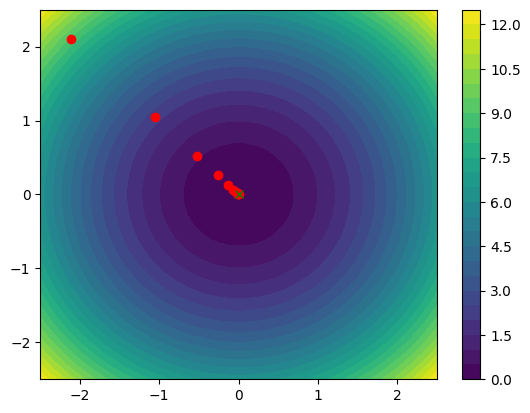

In [6]:
x_0 = [random.uniform(-2.5, 2.5) for _ in range(2)]
grad_list = gradient_descent(df, x_0, save_gradient=True, momentum=0.3)
draw_gradient(f, gradient=grad_list)
res = evaluate(f, grad_list)
print(f"La función tiene un punto crítico en {res}")

In [7]:
# Analizamos la segunda función propuesta
g = lambda X: np.sin(.5 * X[0]**2 - .25 * X[1]**2 + 3) * np.cos(2 * X[0] + 1 - np.e**X[1])

# Bonita derivada :=). En principio esta bien, pero como no me fio de mi, usaré el método
# aproximado para la derivada.

def dg(X):
    arg1 = .5 * X[0]**2 - .25 * X[1]**2 + 3
    arg2 = 2*X[0]-np.e**X[1] + 1
    dx = X[0]*np.cos(arg1) * np.cos(arg2) - 2*np.sin(arg2)*np.sin(arg1)
    dy = np.e**X[1] * np.sin(-arg1) * np.sin(-arg2) - .5 * X[1] * np.cos(-arg1) * np.cos(-arg2)
    return [dx, dy]

La función tiene un punto crítico en (0.001024715990010837, -0.0001514841565831931) que vale 0.14111915218206286


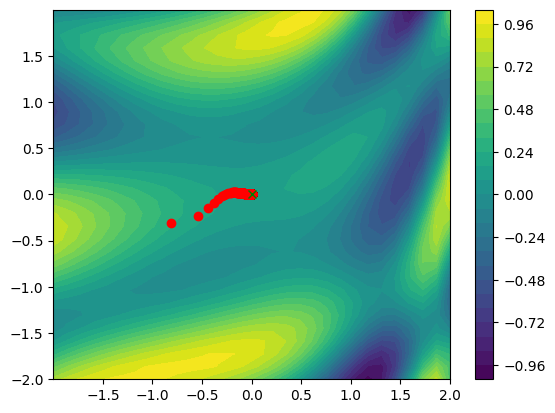

In [12]:
# Dependiendo de x_0 puede que la grafica no sea correcta a la hora de dibujarse.

# No tengo la certeza de que el método del momentum este bien aplicado, ya que 
# continuamente llega al punto (0, 0) el cual no es un mínimo local, sino más 
# bien un punto de silla. No obstante desisto en el intento de encontrar que es 
# lo que esta fallando y asumo que la culpa es de la función por tener tantos
# máximos, mínimos y puntos de silla juntos, ya que en f si parece funciona

x_0 = [random.uniform(-1, 1) for _ in range(2)]
# x_0 = [1.0, -2.5]
grad_list = gradient_descent(g, x_0, learning_rate=.18, save_gradient=True, aprox=True, momentum=0.3, epsilon=0.000001)
res = evaluate(g, grad_list)
draw_gradient(g, gradient=grad_list, rang=2, center=res[1])
print(f"La función tiene un punto crítico en {res[1]} que vale {res[0]}")

In [9]:
# Para finalizar, voy a probar distintos arranques para ver si se llega a un mínimo.

def multi_arranque(f, df, learning_rate=0.1, max_iter=1000, epsilon=0.001, aprox=False, momentum=0.0, n=10):
    best = 10000
    point = []
    for _ in range(n):
        x_0 = [random.uniform(-1, 1) for _ in range(2)]
        sol = gradient_descent(
            df=df, x_0=x_0, learning_rate=learning_rate, max_iter=max_iter, epsilon=epsilon, aprox=aprox, momentum=momentum
        )
        sol, p = evaluate(f, sol)
        if sol < best:
            best = sol
            point = p
    return best, point

In [10]:
# Con momentum no funciona :(
multi_arranque(g, g, aprox=True, n=100, momentum=.3)

(0.141074132988653, (0.007374648355827511, -0.002117585977336813))

In [11]:
# Sin momentum parece que llega a un mínimo correcto, ya que -1 < g(x, y) < 1.
multi_arranque(g, g, aprox=True, n=100)

(-0.9999733889028491, (2.1980355685820294, 1.685091962707087))